In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import statsmodels.api as sm

In [3]:
def DealMissingData(X, dfX):
    ''' deal with missing data
        X: data, type(numpy array)
        dfX: same as X data, type(pandas array) '''
    
    print("----------- Start deal missing data -----------")
    TFarr = np.array(dfX.isna().any())
    for index, ele in enumerate(TFarr):
        if ele:
            if isinstance(X[0][index], str):
                # deal with string data
                imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
                imputer.fit(X[:, [index]])
                X[:, [index]] = imputer.transform(X[:, [index]])
            else:
                # deal with digital data
                imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
                imputer.fit(X[:, [index]])
                X[:, [index]] = imputer.transform(X[:, [index]])
            print(f"{index} column have missing data, fixed!")
        else:
            print(f"{index} column not have missing data")
            
    print("----------- End deal missing data! -----------")
    return X

In [4]:
def MakeOneHot(X, pos={}):
    ''' make one-hot  
        X: data, type(numpy array)
        pos: where need to onehot, type(dictionary) '''
    
    print("----------- Start onehot -----------")
    FeaturesNum = len(X[0])    # init
    for key in pos:
        print(f"{FeaturesNum-pos[key]} column need to one-hot, fixed!")
        ct = ColumnTransformer([(key, OneHotEncoder(), [FeaturesNum-pos[key]])], remainder='passthrough')
        NewX = ct.fit_transform(X)
        X = NewX[:, 1:]
        FeaturesNum = len(X[0])
    
    #print(FeaturesNum)
    #print(X[0])
    print("----------- End onehot -----------")
    return X


In [5]:
def NormalizeData(data_train, data_test):
    ''' normalize data
        data_train: training data, type(numpy array)
        data_test: testing data, type(numpy array) '''
    
    print("----------- Start normalize -----------")
    sc = StandardScaler()
    data_train = sc_X.fit_transform(data_train)
    data_test = sc_X.transform(data_test)
    
    print("----------- End normalize -----------")
    return data_train, data_test

In [6]:
def DrawRelationship(X, y):
    label_x = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
    label_y = 'charges'
    for index, ele in enumerate(label_x):
        allarr = []
        for i in range(len(X)):
            allarr.append(X[i][index])
            
        plt.scatter(allarr, y, c="red")
        plt.xlabel(ele)
        plt.ylabel(label_y)
        plt.show() 

<h1>Data preprocessing</h1>

In [9]:
df = pd.read_csv(".//dataset/final_project_dataset_1.csv")

dfX = df.iloc[:, :-1]
X = dfX.values
y = df.iloc[:, -1].values
#DrawRelationship(X, y)

X = DealMissingData(X, dfX)

pos2onehot = {'Sex': 5, 'children': 3, 'Smoker': 2, 'Region': 1}
X = MakeOneHot(X, pos2onehot)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# X_train, X_test = NormalizeData(X_train, X_test)

print("Preprocessing data done!")

----------- Start deal missing data -----------
0 column not have missing data
1 column not have missing data
2 column not have missing data
3 column not have missing data
4 column not have missing data
5 column not have missing data
----------- End deal missing data! -----------
----------- Start onehot -----------
1 column need to one-hot, fixed!
3 column need to one-hot, fixed!
8 column need to one-hot, fixed!
9 column need to one-hot, fixed!
----------- End onehot -----------
Preprocessing data done!


C:\Users\john\copy\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<h1>Polynomial</h1>

In [10]:
poly_reg = PolynomialFeatures(degree=7)    # degree=1 >> b + bX1  ==  linear
X_poly = poly_reg.fit_transform(X_train)

# linear gression
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
Poly_pred = poly_lin_reg.predict(poly_reg.transform(X_test))
Poly_acc = poly_lin_reg.score(poly_reg.transform(X_test), y_test)

In [12]:
print(Poly_pred[0])
print(Poly_acc)

8124.103678263316
-5878316.11148767


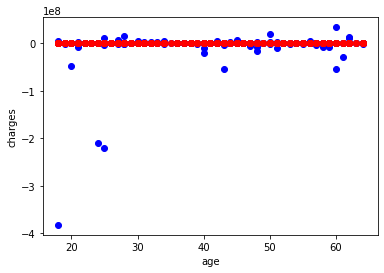

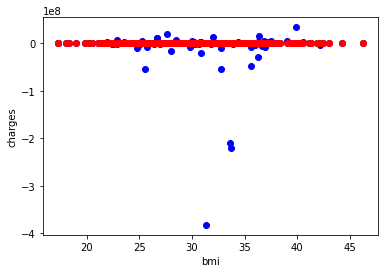

In [13]:
allarr = []
for i in range(len(X_test)):
    allarr.append(X_test[i][-2])

plt.scatter(allarr, Poly_pred, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('age')
plt.ylabel('charges')
plt.show() 

allarr = []
for i in range(len(X_test)):
    allarr.append(X_test[i][-1])

plt.scatter(allarr, Poly_pred, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show() 

<h1>Linear</h1>

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
Linear_pred = lin_reg.predict(X_test)
Linear_acc = lin_reg.score(X_test, y_test)

In [16]:
print(Linear_pred[:5])
print(Linear_acc)

[11135.73804883  9446.44007899 38866.31389769 16130.19841251
  6829.59464758]
0.7983507767817665


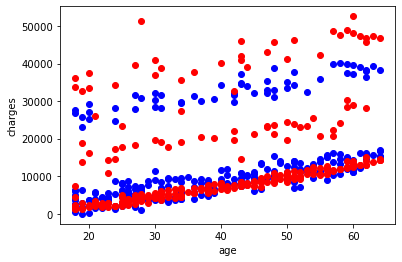

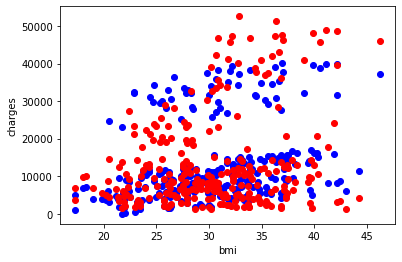

In [17]:
allarr = []
for i in range(len(X_test)):
    allarr.append(X_test[i][-2])

plt.scatter(allarr, Linear_pred, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('age')
plt.ylabel('charges')
plt.show() 

allarr = []
for i in range(len(X_test)):
    allarr.append(X_test[i][-1])

plt.scatter(allarr, Linear_pred, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show() 

<h1>Grid_search<\h1>

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 40],'max_features': [2, 4, 6, 8, 10, 12]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5, 6]},
]
print(type(param_grid))

<class 'list'>


In [23]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8, 10,

In [24]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 40}

In [25]:
grid_search.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__bootstrap': True,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 'warn',
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob

In [26]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.24540746e-03, 9.35901159e-03, 7.88121119e-03, 6.17507665e-01,
       8.25896299e-03, 8.82460368e-03, 4.80676167e-03, 4.60095829e-03,
       4.13567086e-04, 9.20893396e-03, 1.41296833e-01, 1.79596084e-01])

In [29]:
from sklearn.metrics import mean_squared_error
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [30]:
final_rmse

4286.008677758236

In [31]:
final_model.score(X_test, y_test)

0.8845605810637163

<h1>Random search<\h1>

In [39]:
# Random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=300),
    'max_features': randint(low=1, high=12),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=40, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [40]:
rnd_search.best_params_

{'max_features': 5, 'n_estimators': 258}

In [41]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([8.13788989e-03, 9.67602898e-03, 7.12688191e-03, 6.04981906e-01,
       8.35274885e-03, 9.01439718e-03, 4.71626286e-03, 4.43242726e-03,
       6.02669253e-04, 9.87896490e-03, 1.51517041e-01, 1.81562781e-01])

In [42]:
rnd_search_model = rnd_search.best_estimator_
rnd_search_predictions = rnd_search_model.predict(X_test)

rnd_search_mse = mean_squared_error(y_test, rnd_search_predictions)
rnd_search_rmse = np.sqrt(rnd_search_mse)

In [43]:
rnd_search_model.score(X_test, y_test)

0.8909714321915588

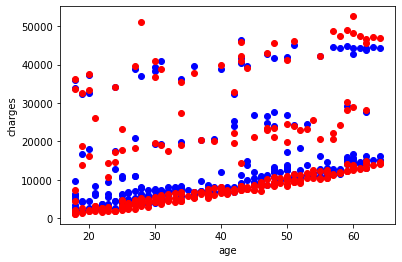

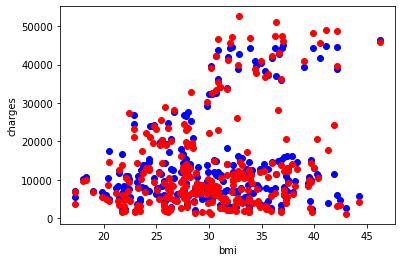

In [45]:
allarr = []
for i in range(len(X_test)):
    allarr.append(X_test[i][-2])

plt.scatter(allarr, rnd_search_predictions, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('age')
plt.ylabel('charges')
plt.show() 

allarr = []
for i in range(len(X_test)):
    allarr.append(X_test[i][-1])

plt.scatter(allarr, rnd_search_predictions, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show() 

<h1>OLS</h1>

In [15]:
# append 1 std
X_train_std = np.append(arr=np.ones((len(X_train), 1)).astype(int), values=X_train, axis=1)
print(X_train_std[:5])

[[1 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 52 27.36]
 [1 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 30 44.22]
 [1 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.265]
 [1 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 20 26.84]
 [1 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 27 24.75]]


In [16]:
# try to optimize model
X_opt = X_train_std[:, [0, 4, 6, 8, 11, 12]]
X_opt = np.array(X_opt, dtype=float)

# sm.OLS()
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     654.1
Date:                Sat, 26 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:34:20   Log-Likelihood:                -11526.
No. Observations:                1137   AIC:                         2.306e+04
Df Residuals:                    1131   BIC:                         2.309e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.18e+04   1019.644    -11.574      0.000   -1.38e+04   -9801.123
x1          2.375e+04    452.561     52.476      0.000    2.29e+04    2.46e+04
x2          1563.9213    478.262      3.270      0.001     625.542    2502.301
x3          2918.6207   1296.010      2.252      0.025     375.767    5461.474
x4           262.5905     13.016     20.174      0.000     237.052     288.129
x5           314.2068     29.904     10.507      0.000     255.533     372.881
==============================================================================
Omnibus:                      258.397   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.458
Skew:                           1.218   Prob(JB):                    5.05e-135
Kurtosis:                       5.668   Cond. No.                         365.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X_train_opt = X_train[:, [3, 5, 7, 10, 11]]    # select opt's columns
X_test_opt = X_test[:, [3, 5, 7, 10, 11]]   # select opt's columns correspond train

In [18]:
poly_reg = PolynomialFeatures(degree=7)    # degree=1 >> b + bX1  ==  linear
X_poly = poly_reg.fit_transform(X_train_opt)

poly_reg_opt = LinearRegression()
poly_reg_opt.fit(X_poly, y_train)

LinearRegression()

In [19]:
Poly_pred_opt = poly_reg_opt.predict(poly_reg.fit_transform(X_test_opt))
Poly_acc_opt = poly_reg_opt.score(poly_reg.fit_transform(X_test_opt), y_test)

In [20]:
print(Poly_pred_opt[0])
print(Poly_acc_opt)

8478.63934439901
-2.724277459523115


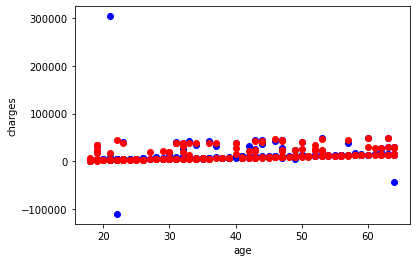

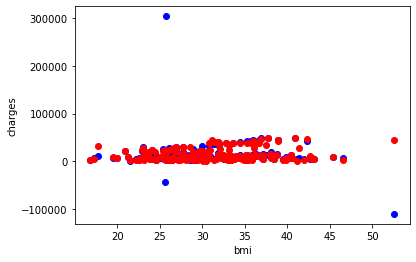

In [21]:
allarr = []
for i in range(len(X_test_opt)):
    allarr.append(X_test_opt[i][-2])

plt.scatter(allarr, Poly_pred_opt, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('age')
plt.ylabel('charges')
plt.show() 

allarr = []
for i in range(len(X_test_opt)):
    allarr.append(X_test_opt[i][-1])

plt.scatter(allarr, Poly_pred_opt, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show() 

In [22]:

# do linear regression
linear_reg_opt = LinearRegression()
linear_reg_opt.fit(X_train_opt, y_train)
# than we can find the performance better than previous model's

LinearRegression()

In [23]:
Linear_pred_opt = linear_reg_opt.predict(X_test_opt)
Linear_acc_opt = linear_reg_opt.score(X_test_opt, y_test)

In [24]:
print(Linear_pred_opt[:5])
print(Linear_acc_opt)

[ 9488.92223371  7084.01850834 37200.20448435  8366.68933902
 26965.66296614]
0.7874567108932204


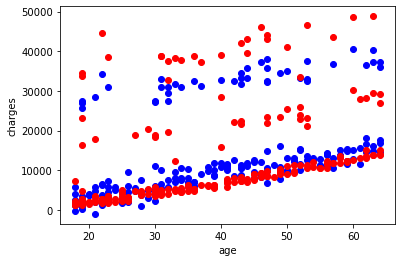

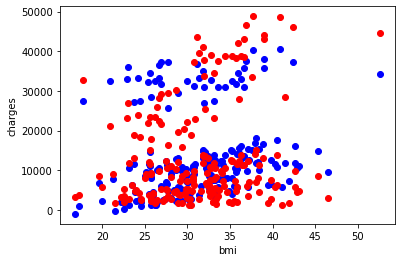

In [25]:
allarr = []
for i in range(len(X_test_opt)):
    allarr.append(X_test_opt[i][-2])

plt.scatter(allarr, Linear_pred_opt, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('age')
plt.ylabel('charges')
plt.show() 

allarr = []
for i in range(len(X_test_opt)):
    allarr.append(X_test_opt[i][-1])

plt.scatter(allarr, Linear_pred_opt, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show() 

<h1>SVR</h1>

In [26]:
sv_reg = SVR(kernel='rbf', degree=5)
sv_reg.fit(X_train, y_train)

SVR(degree=5)

In [27]:
Sv_pred = sv_reg.predict(X_test)
Sv_acc = sv_reg.score(X_test, y_test)

In [28]:
print(Sv_pred[5])
print(Sv_acc)

9442.350556706071
-0.08661625023160391


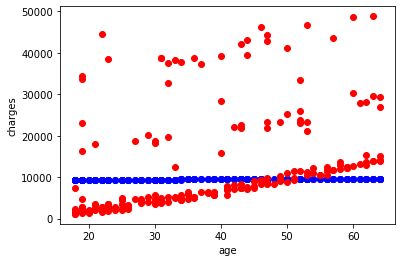

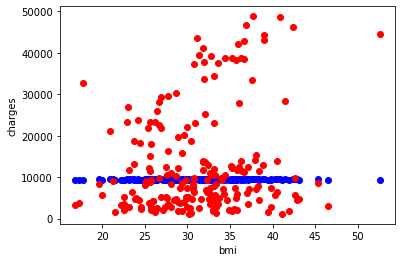

In [29]:
allarr = []
for i in range(len(X_test)):
    allarr.append(X_test[i][-2])

plt.scatter(allarr, Sv_pred, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('age')
plt.ylabel('charges')
plt.show() 

allarr = []
for i in range(len(X_test)):
    allarr.append(X_test[i][-1])

plt.scatter(allarr, Sv_pred, c="blue")
plt.scatter(allarr, y_test, c="red")
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show() 

<h1>mean_squared_error</h1>

In [30]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, Poly_pred)))
print(np.sqrt(mean_squared_error(y_test, Linear_pred)))
print(np.sqrt(mean_squared_error(y_test, Poly_pred_opt)))
print(np.sqrt(mean_squared_error(y_test, Linear_pred_opt)))
print(np.sqrt(mean_squared_error(y_test, Sv_pred)))

6218035.635186677
5614.155416431429
23813.5943386981
5688.89129775043
12862.993042103617
